In [1]:
import os
import subprocess
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

#go to working directory
work_dir='/mnt/Data1/ribli/mhc/'
subprocess.call(['mkdir',work_dir])
os.chdir(work_dir)

### Download data

In [2]:
%%bash
#wget http://tools.iedb.org/static/main/benchmark_mhci_reliability.tar.gz
#tar -xvf benchmark_mhci_reliability.tar.gz

In [3]:
%%bash
ls -hal benchmark_mhci_reliability

total 40K
drwxr-xr-x 5 ribli users 4.0K Mar 11  2015 .
drwxr-xr-x 3 ribli users 4.0K Apr 27 12:48 ..
drwxr-x--- 5 ribli users 4.0K Mar 11  2015 binding
-rwxr-x--- 1 ribli users 1.3K Mar 11  2015 description_files_at_iedbtools.txt
drwxr-x--- 3 ribli users 4.0K Mar 11  2015 features
-rwxr-x--- 1 ribli users  16K Mar 11  2015 FILE_S1.tar.gz
drwxr-x--- 6 ribli users 4.0K Mar 11  2015 predictions


### Load it

In [4]:
dataf='benchmark_mhci_reliability/binding/bd2013.1/bdata.20130222.mhci.public.1.txt'
data=pd.read_csv(dataf,sep='\t')
data.head()

,species,mhc,peptide_length,cv,sequence,inequality,meas
0,cow,BoLA-HD6,9,TBD,ALFYKDGKL,=,1.000000
1,cow,BoLA-HD6,9,TBD,ALYEKKLAL,=,1.000000
2,cow,BoLA-HD6,9,TBD,AMKDRFQPL,=,4.521706
3,cow,BoLA-HD6,9,TBD,AQRELFFTL,=,1.000000
4,cow,BoLA-HD6,9,TBD,FMKVKFEAL,=,1.576747


### Species ?

In [5]:
data.groupby('species',as_index=False).count()[['species','meas']]

,species,meas
0,None,160
1,chimpanzee,3712
2,cow,57
3,gorilla,15
4,human,151933
5,macaque,14028
6,mouse,9787


### go on with human

In [6]:
hum_data=data[data.species=='human']

## No duplicates !!!

In [51]:
np.sum(hum_data[['mhc','sequence']].duplicated())

0

### But peptides are measured with many different HLA types

In [49]:
np.sum(hum_data.sequence.duplicated())

123465

### 28k unique peptids

In [56]:
len(hum_data.groupby(['sequence']).count())

28468

### HLA types

In [7]:
hum_data.groupby('mhc',as_index=False).count()[['mhc','meas']].head()

,mhc,meas
0,HLA-A*01:01,4558
1,HLA-A*02:01,11920
2,HLA-A*02:02,4155
3,HLA-A*02:03,6302
4,HLA-A*02:04,4


### Sorted by name

<Container object of 118 artists>

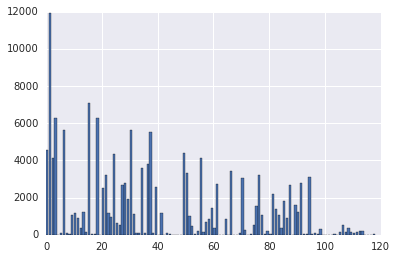

In [8]:
hla_type=hum_data.groupby('mhc',as_index=False).count()['mhc']
hla_type_c=hum_data.groupby('mhc',as_index=False).count()['species']
plt.bar(range(len(hla_type_c)),hla_type_c)

### sorted by count

<Container object of 118 artists>

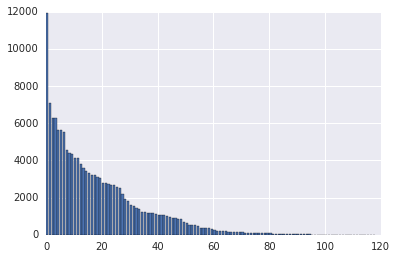

In [14]:
plt.bar(range(len(hla_type_c)),sorted(hla_type_c,reverse=True))

### Peptide lengths

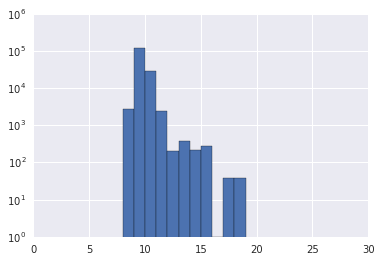

In [15]:
dump=plt.hist(hum_data.peptide_length.values,bins=range(0,max(hum_data.peptide_length)),log=True)

### The measurement value

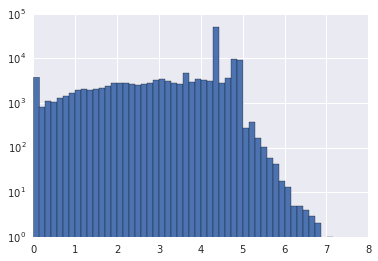

In [16]:
dump=plt.hist(np.log10(hum_data.meas.values),bins=50,log=True)

### cv, cross valdation: to be done :)

In [17]:
hum_data.groupby('cv',as_index=False).count()[['cv','meas']]

,cv,meas
0,TBD,151933


### Not just equality measurements

In [18]:
hum_data.groupby('inequality',as_index=False).count()[['inequality','meas']]

,inequality,meas
0,<,1523
1,=,83751
2,>,66659


### Equals are nicely distributed

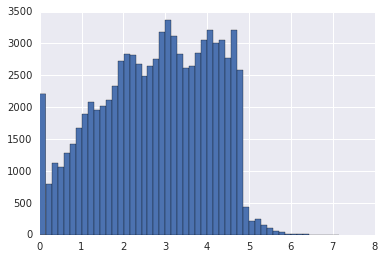

In [39]:
dump=plt.hist(np.log10(hum_data[hum_data.inequality=='='].meas.values),bins=50)

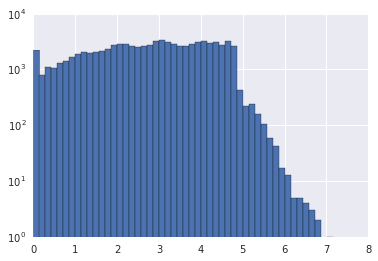

In [40]:
dump=plt.hist(np.log10(hum_data[hum_data.inequality=='='].meas.values),bins=50,log=True)

### Larger than are not

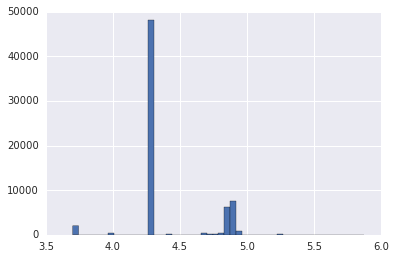

In [41]:
dump=plt.hist(np.log10(hum_data[hum_data.inequality=='>'].meas.values),bins=50)

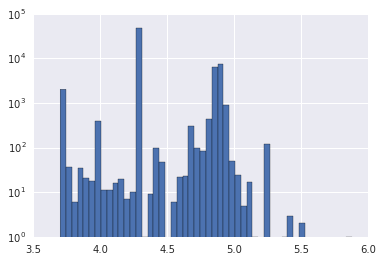

In [42]:
dump=plt.hist(np.log10(hum_data[hum_data.inequality=='>'].meas.values),bins=50,log=True)

### Smaller than could be basically 0 but there are few points, they can be dropped

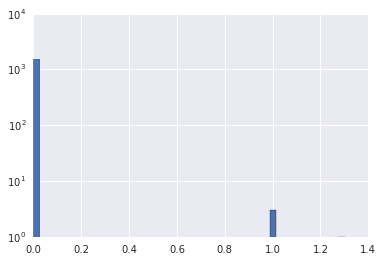

In [21]:
dump=plt.hist(np.log10(hum_data[hum_data.inequality=='<'].meas.values),bins=50,log=True)

### Effect of peptide length

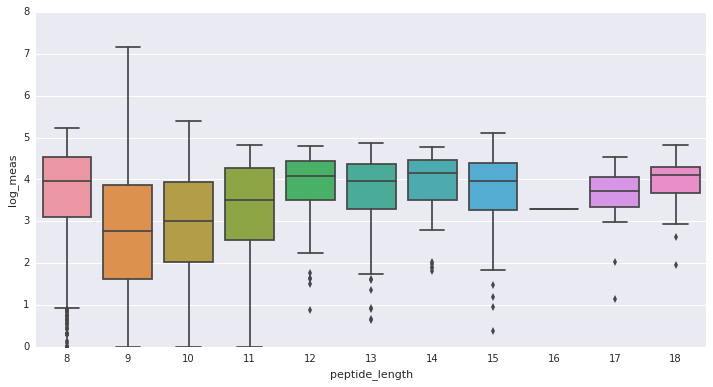

In [34]:
plt.figure(figsize=(12,6))
temp=hum_data[hum_data.inequality=='=']
temp.loc[:,'log_meas']=np.log10(temp.meas.values)

sns.boxplot('peptide_length','log_meas',data=temp)

### Effect of MHC type

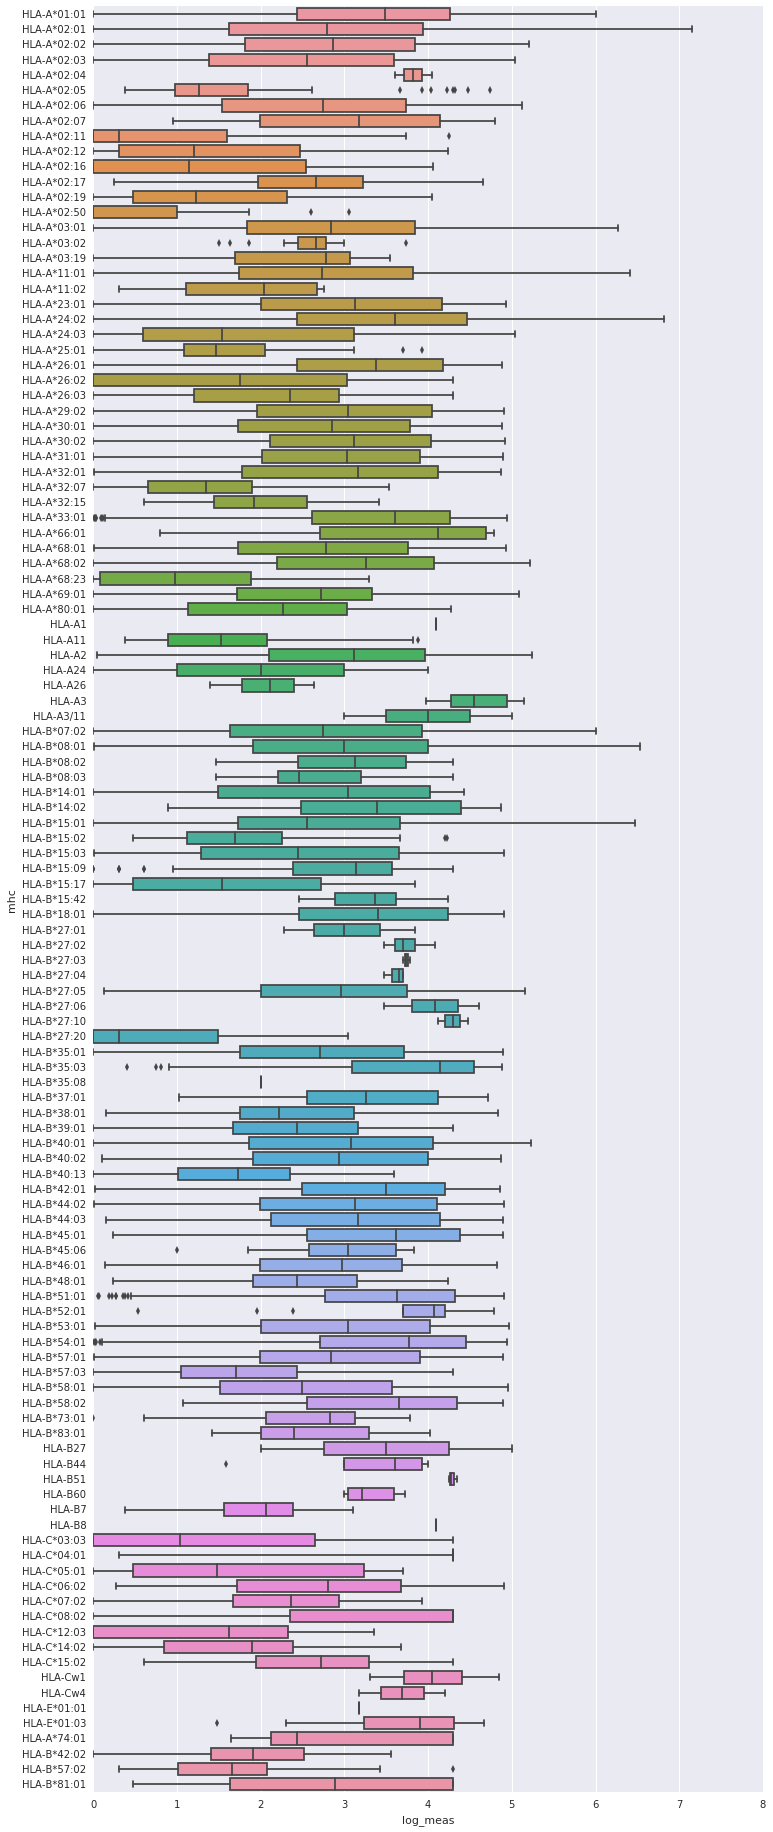

In [37]:
plt.figure(figsize=(12,32))
temp=hum_data[hum_data.inequality=='=']
temp.loc[:,'log_meas']=np.log10(temp.meas.values)

sns.boxplot('log_meas','mhc',data=temp,orient='h')

#### Std

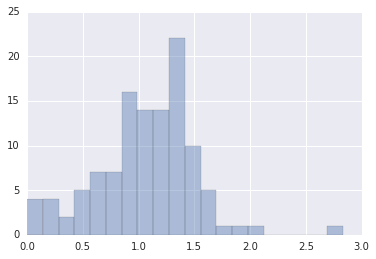

In [83]:
tmp=pd.DataFrame(hum_data,copy=True)
tmp.loc[:,'log_meas']=np.log10(tmp.meas)
std=tmp.groupby(['mhc']).std().log_meas.values
sns.distplot(std[~np.isnan(std)],kde=False,bins=20)

### Std deviation among 1 peptid

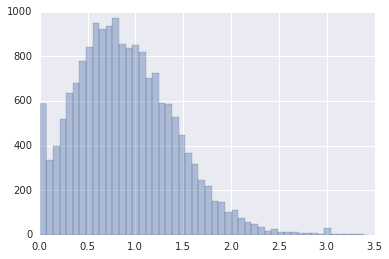

In [81]:
tmp=pd.DataFrame(hum_data,copy=True)
tmp.loc[:,'log_meas']=np.log10(tmp.meas)
std=tmp.groupby(['sequence']).std().log_meas.values
sns.distplot(std[~np.isnan(std)],kde=False,bins=50)